# Plot country suicide mortality rates 

In [9]:
import seaborn as sns
import matplotlib.pyplot as pl
from matplotlib import rcParams
import matplotlib.pylab as plt1

import pandas as pd
import numpy as np

## Transform data for plotting

In [10]:
dfagestd2=pd.read_csv("data_agestd2.csv")
dfagestd2.rename(columns={ "Both_m": "Both genders", "Location":"Country"}, inplace=True)
cols=dfagestd2.columns
print(cols)

Index(['Country', 'Period', 'Both genders', 'Both_minus_sd', 'Both_plus_sd',
       'Male_m', 'Male_minus_sd', 'Male_plus_sd', 'Female_m',
       'Female_minus_sd', 'Female_plus_sd'],
      dtype='object')


In [11]:
df10=dfagestd2.melt(id_vars=["Country","Period"], value_vars=["Both genders","Male_m","Female_m"])
df10.rename(columns={ "variable":"Gender", "value" : "SMR"}, inplace=True)
df=df10.loc[df10['Gender'].isin(['Both genders'])].copy()
df.head

<bound method NDFrame.head of           Country  Period        Gender   SMR
0     Afghanistan    2019  Both genders   6.0
1     Afghanistan    2018  Both genders   5.9
2     Afghanistan    2017  Both genders   6.0
3     Afghanistan    2016  Both genders   6.0
4     Afghanistan    2015  Both genders   6.0
...           ...     ...           ...   ...
3655     Zimbabwe    2004  Both genders  21.5
3656     Zimbabwe    2003  Both genders  20.2
3657     Zimbabwe    2002  Both genders  20.3
3658     Zimbabwe    2001  Both genders  19.5
3659     Zimbabwe    2000  Both genders  20.0

[3660 rows x 4 columns]>

#### Plotting function

In [12]:
def plotcluster(df, select_countries, titlestr, save_file):
    df8=df.loc[df['Country'].isin(select_countries)].copy()
    # figure size in inches
    rcParams['figure.figsize'] = 11.7,8.27
    
    sns.set_style('darkgrid')
    plt=sns.lineplot(data=df8, x="Period", y="SMR", hue="Country", style="Gender", markers=True, 
                    hue_order=select_countries)
    xticks = np.arange(2000, 2020, 1)
    xlabels = [f'{x:d}' for x in xticks]
    
    yticks=[0,3.4,5.1,6.6]
    ylabels = [f'{y:f}' for y in yticks]
    
    plt.set_xticks(xticks, labels=xlabels)
    plt.tick_params(axis='x', rotation=90, labelsize=16)
    plt.tick_params(axis='y', labelsize=16)
    
    #plt.set_yticks(yticks, labels=ylabels)
    #plt.tick_params(axis='y', rotation=90)
    #plt.set(xlabel="Period in years", ylabel='Age standardized suicide mortality rate per 100,000 population')
    
    plt.axes.set_title(titlestr,fontsize=30)
    plt.set_xlabel("Period in years",fontsize=18)
    plt.set_ylabel("Age standardized SMR",fontsize=18)
    
    plt1.setp(plt.get_legend().get_texts(), fontsize='16') # for legend text
    plt1.setp(plt.get_legend().get_title(), fontsize='18') # for legend title
    plt1.savefig(save_file+".png",dpi=600)
    plt1.show()


# Cluster C8

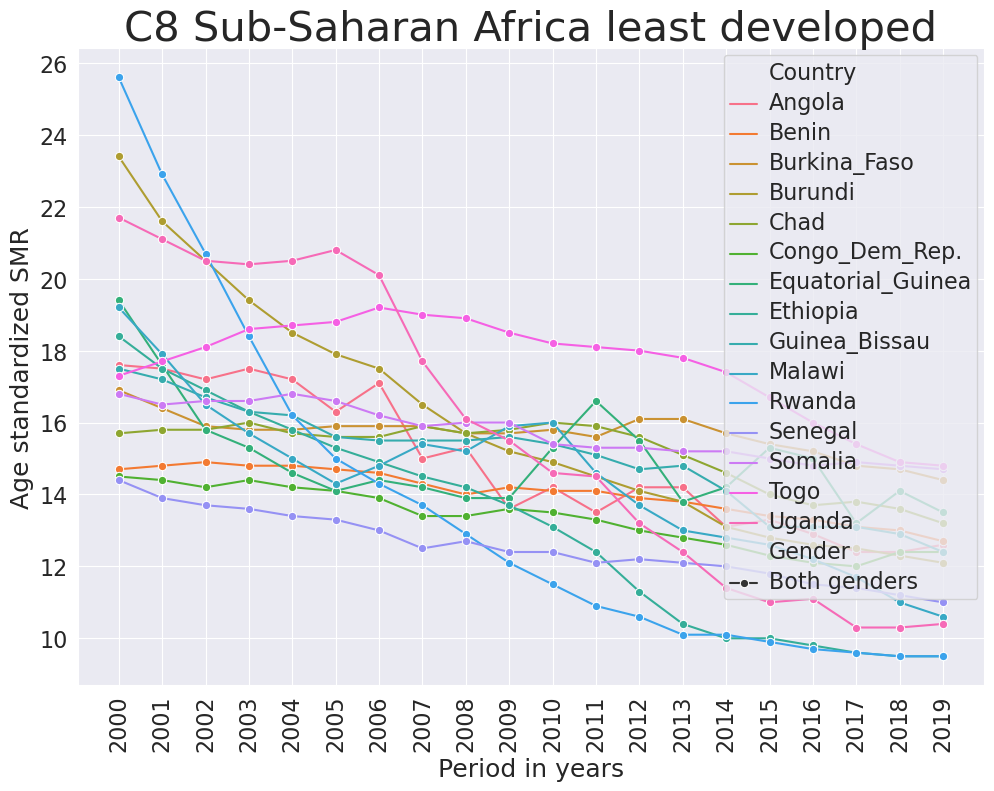

In [15]:
#cluster c8
#least developed
select_countries=['Angola','Benin','Burkina_Faso','Burundi','Chad','Congo_Dem_Rep.','Equatorial_Guinea','Ethiopia','Guinea_Bissau',
                 'Malawi','Rwanda','Senegal','Somalia','Togo','Uganda']
plotcluster(df, select_countries, "C8 Sub-Saharan Africa least developed", "C8_least_developed")

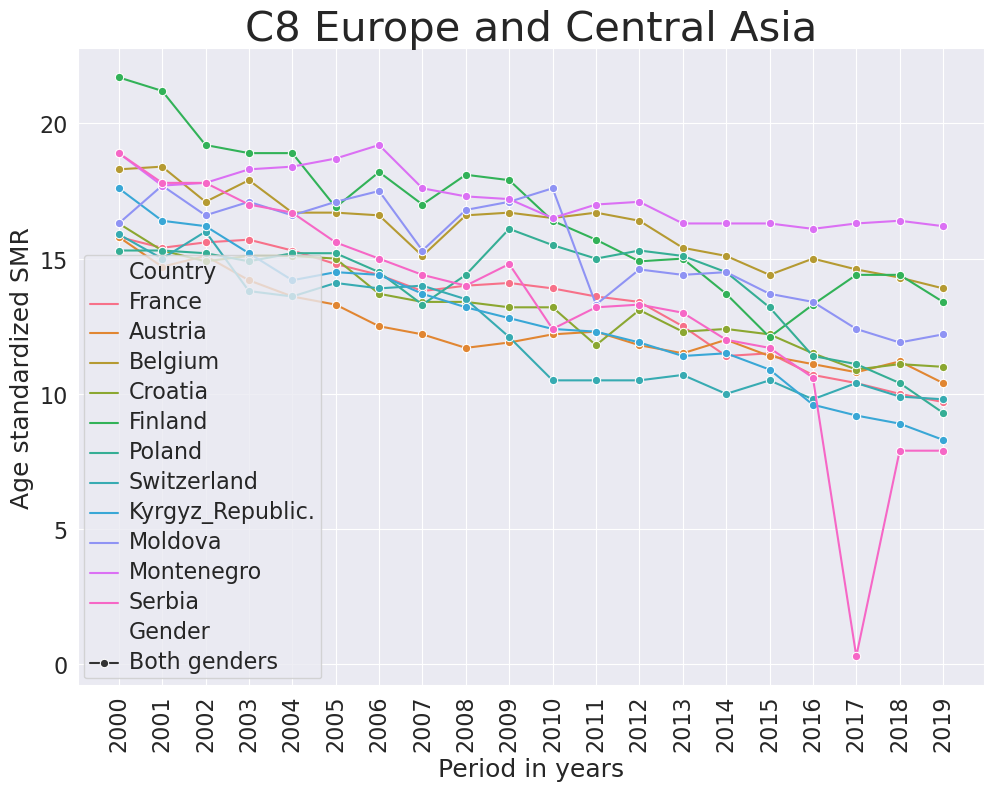

In [17]:
#cluster c8
#European
select_countries=['France','Austria','Belgium','Croatia','Finland','Poland','Switzerland',
                  'Kyrgyz_Republic.','Moldova','Montenegro','Serbia']
plotcluster(df, select_countries, "C8 Europe and Central Asia", "C8_Europe")

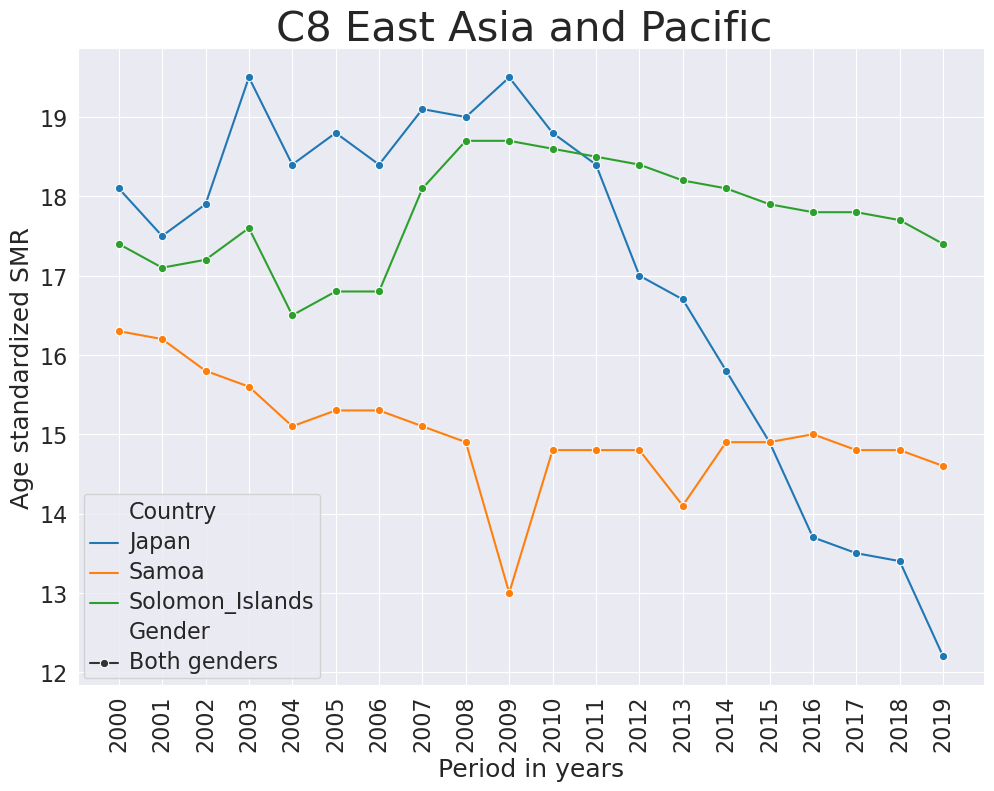

In [18]:
#cluster c8
#East Asia
select_countries=['Japan','Samoa','Solomon_Islands']
plotcluster(df, select_countries, "C8 East Asia and Pacific ", "C8_East_Asia")

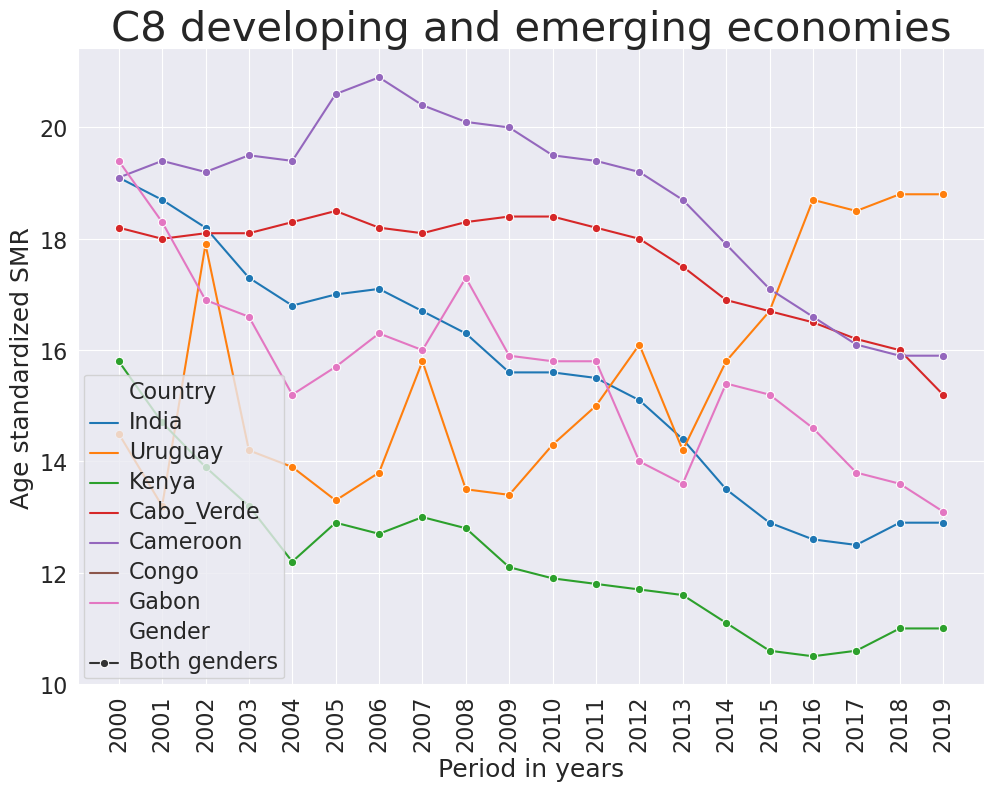

In [20]:
#cluster c8
#African developing and other emerging
select_countries=['India','Uruguay','Kenya','Cabo_Verde','Cameroon','Congo','Gabon']
plotcluster(df, select_countries, "C8 developing and emerging economies", "C8_developing_emerging")

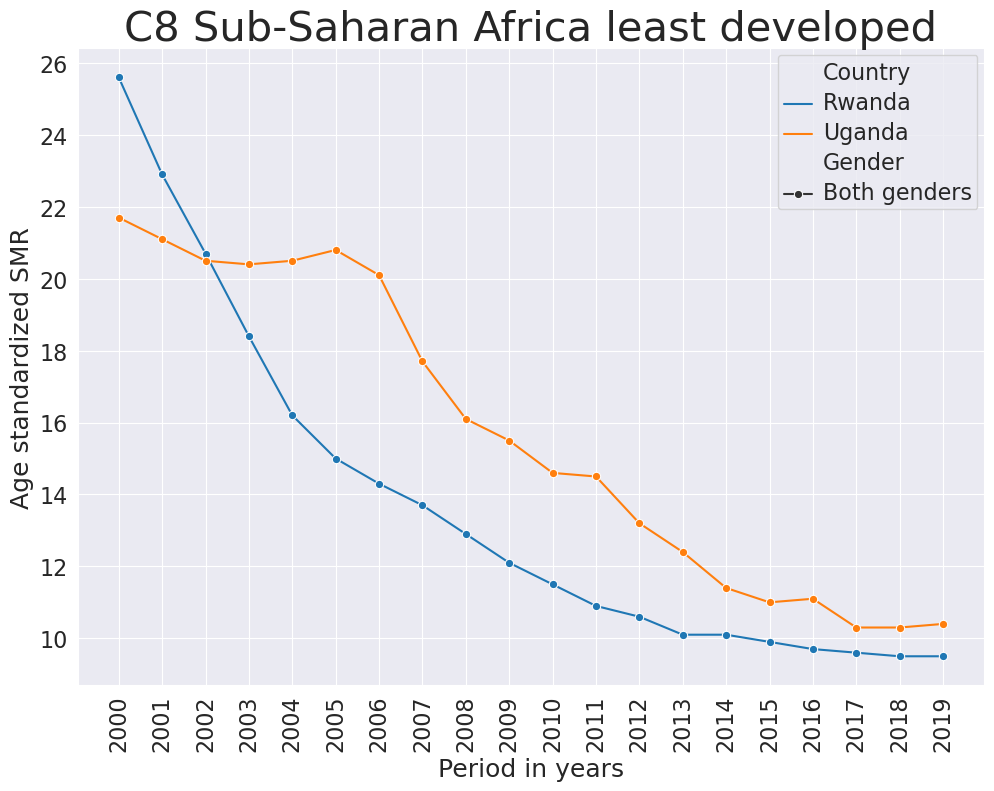

In [21]:
#cluster c8
#least developed
select_countries=['Rwanda','Uganda']
plotcluster(df, select_countries, "C8 Sub-Saharan Africa least developed", "C8_test")

## Cluster 1

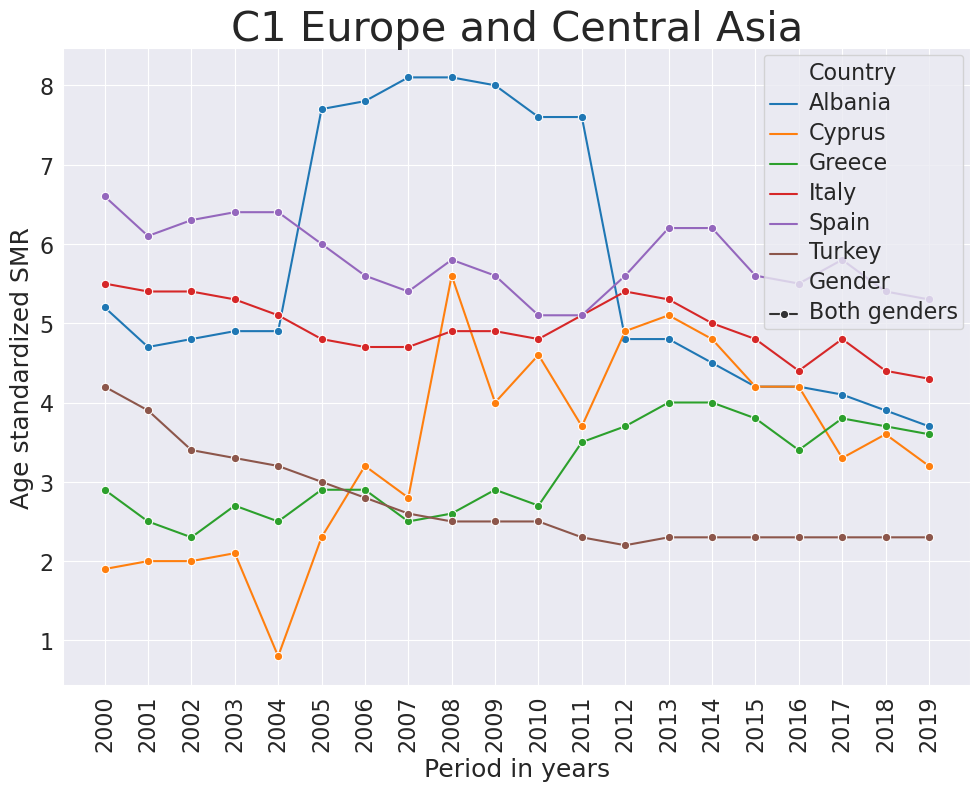

In [23]:
#cluster c1
#Europe and central asia
#select_countries=['Albania','Armenia','Azerbaijan','Cyprus','Greece','Italy','Spain','Tajikistan','Turkey']
select_countries=['Albania','Cyprus','Greece','Italy','Spain','Turkey']
plotcluster(df, select_countries, "C1 Europe and Central Asia", "C10_Europe")

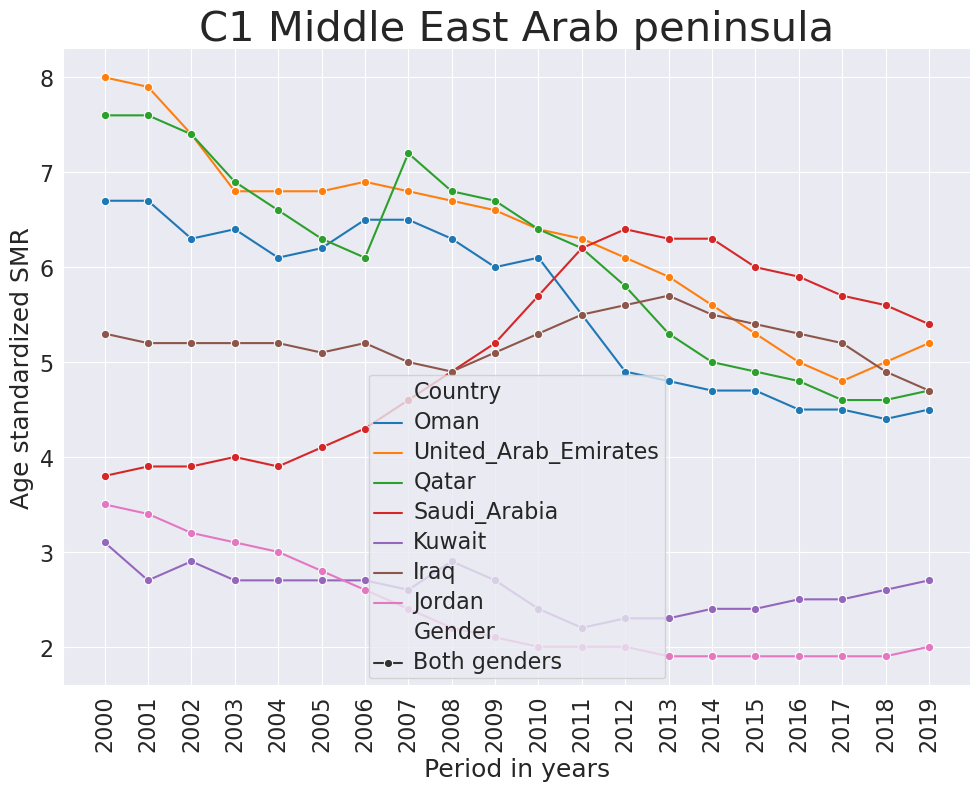

In [26]:
#cluster c1
#Middle East
#select_countries=['Iran','Iraq','Israel','Jordan','Kuwait','Lebanon','Oman','Qatar','Saudi_Arabia','Syria','United_Arab_Emirates']
select_countries=['Oman','United_Arab_Emirates','Qatar','Saudi_Arabia','Kuwait','Iraq','Jordan']
plotcluster(df, select_countries, "C1 Middle East Arab peninsula", "C10_Middle_East_Arab_peninsula")

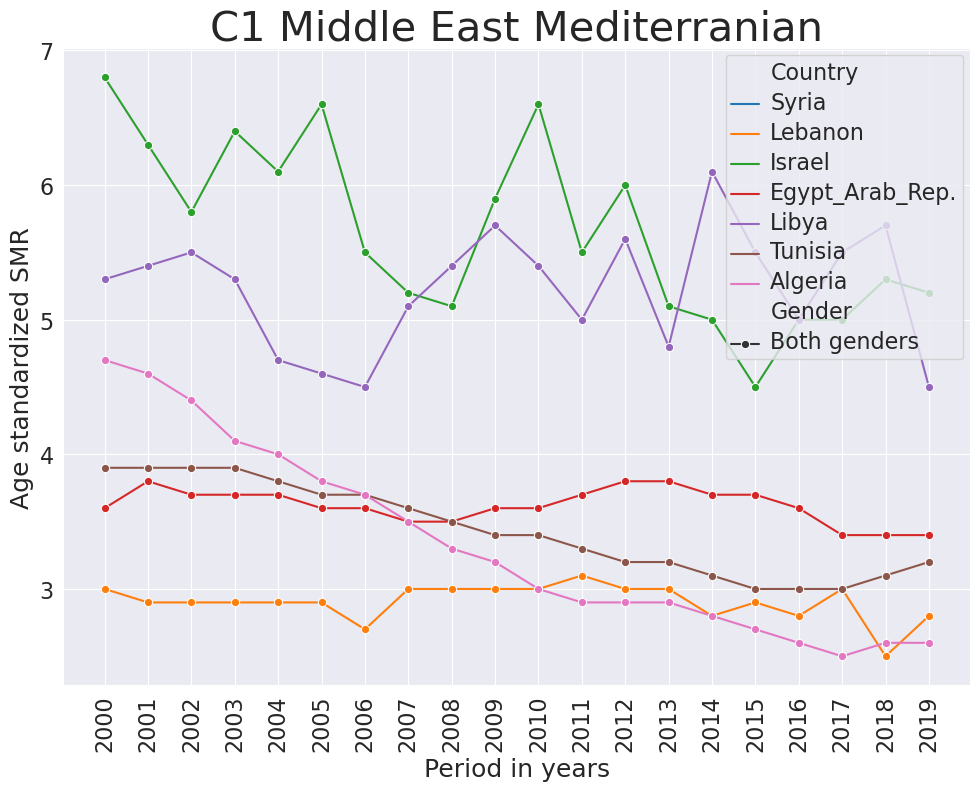

In [29]:
#cluster c1
#Middle East Mediterranian
#,'Iran','Azerbaijan','Armenia'
select_countries=['Syria','Lebanon','Israel','Egypt_Arab_Rep.','Libya','Tunisia','Algeria']
plotcluster(df, select_countries, "C1 Middle East Mediterranian", "C10_Middle_East_Mediterranian")

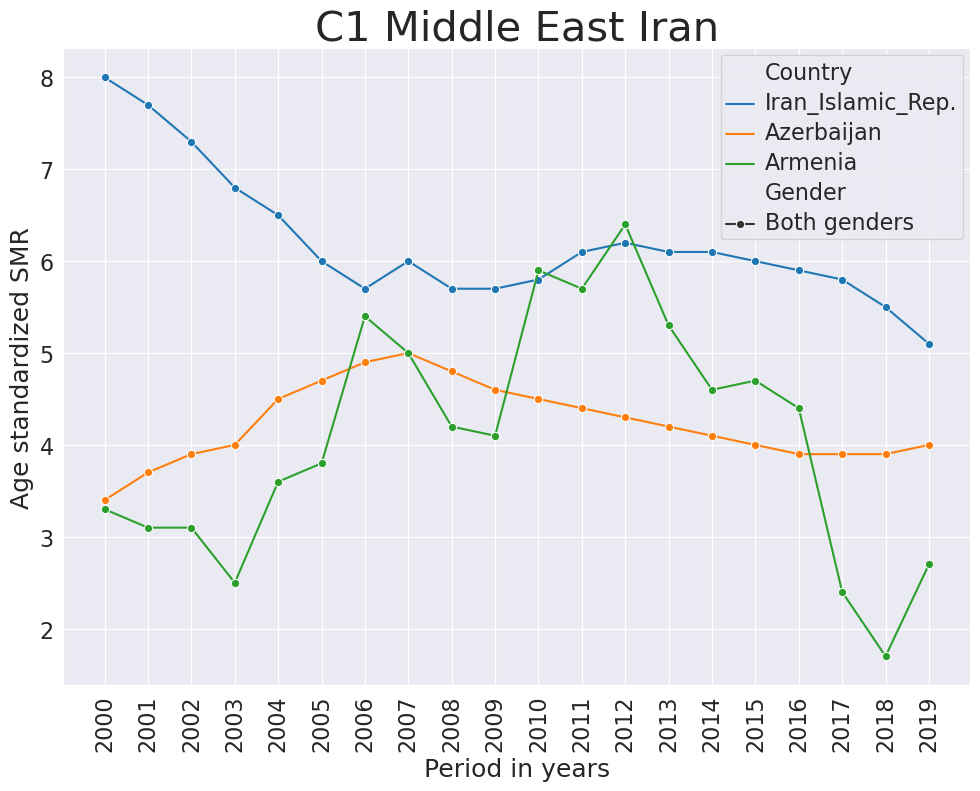

In [32]:
#cluster c1
#Middle East Iran
#,'Iran','Azerbaijan','Armenia'
#select_countries=['Syria','Lebanon','Israel','Egypt_Arab_Rep.','Libya','Tunisia','Algeria']
select_countries=['Iran_Islamic_Rep.','Azerbaijan','Armenia']
plotcluster(df, select_countries, "C1 Middle East Iran", "C10_Middle_East_Iran")

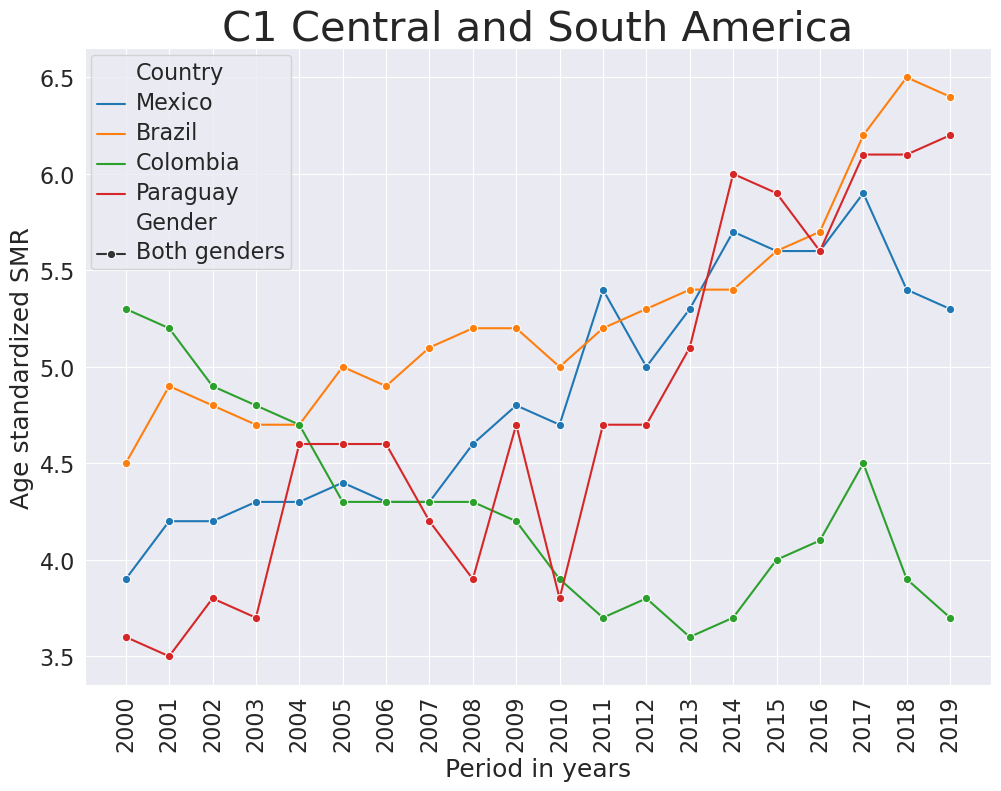

In [39]:
#cluster c1
#Central and South America
# Peru , Panama Honduras- small
select_countries=['Mexico','Brazil','Colombia','Paraguay']
plotcluster(df, select_countries, "C1 Central and South America", "C10_Latin_America")

## Mediun clusters C2 C3

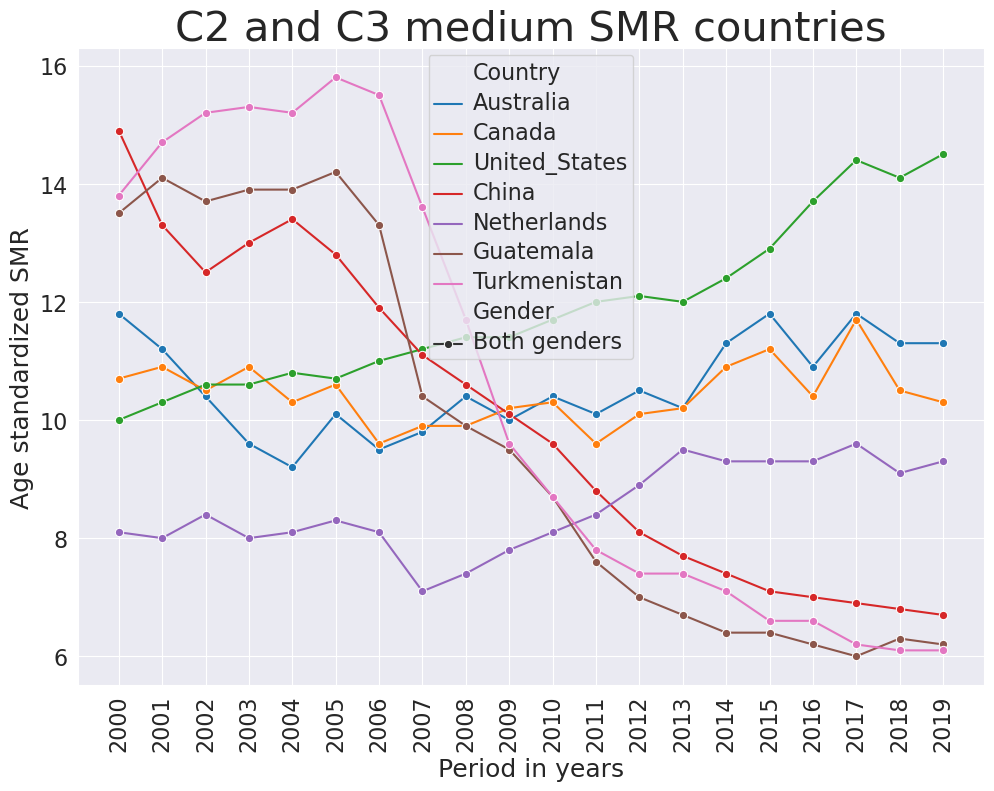

In [48]:
#cluster c2, c3
#Medium clusters
select_countries=['Australia','Canada', 'United_States','China','Netherlands','Guatemala','Turkmenistan']
plotcluster(df, select_countries, "C2 and C3 medium SMR countries", "C23_Medium")

## Image with percentiles

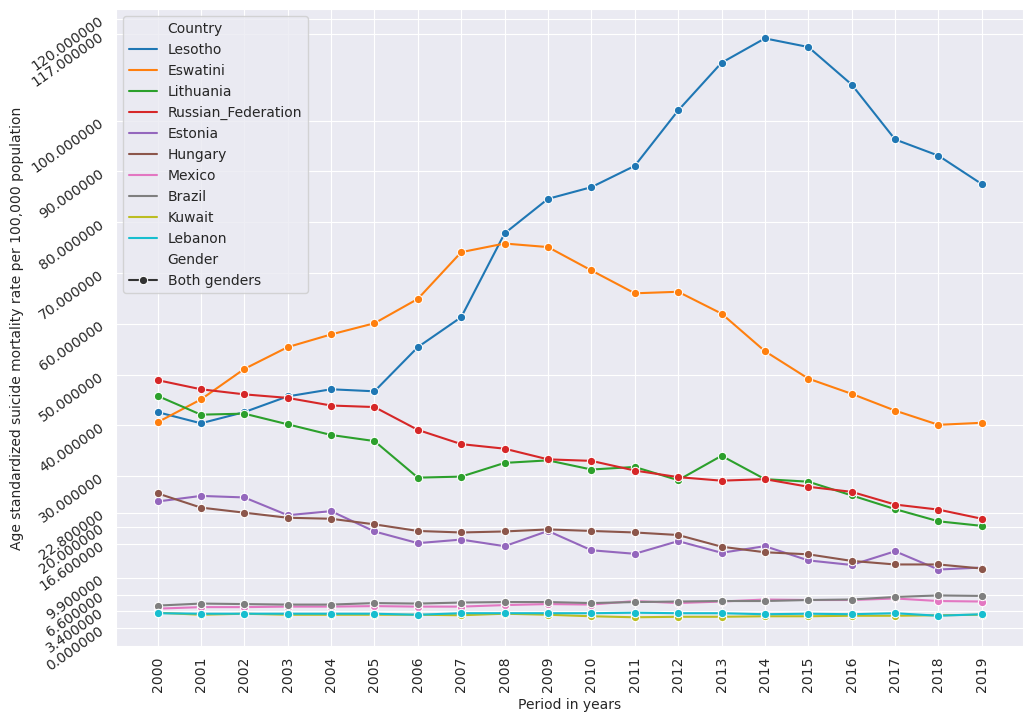

In [20]:
select_countries8=['Estonia','Hungary','Lithuania','Russian_Federation','Lesotho','Eswatini','Mexico','Brazil','Kuwait','Lebanon']
#select_countries8=['Suriname','Central_Africa','South_Africa','Micronesia_Fed_Sts..']
df8=df.loc[df['Country'].isin(select_countries8)].copy()


from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

sns.set_style('darkgrid')
plt=sns.lineplot(data=df8, x="Period", y="SMR", hue="Country", style="Gender",
                 markers=True, 
                 hue_order=['Lesotho','Eswatini','Lithuania','Russian_Federation','Estonia','Hungary','Mexico','Brazil','Kuwait','Lebanon'])
xticks = np.arange(2000, 2020, 1)
xlabels = [f'{x:d}' for x in xticks]

yticks=[0,3.4,6.6,9.9,16.6,20,22.8,30,40,50,60,70,80,90,100,117,120]
ylabels = [f'{y:f}' for y in yticks]

plt.set_xticks(xticks, labels=xlabels)
plt.tick_params(axis='x', rotation=90)

plt.set_yticks(yticks, labels=ylabels)
plt.tick_params(axis='y', rotation=35)

plt.set(xlabel="Period in years", ylabel='Age standardized suicide mortality rate per 100,000 population')

pl.savefig("Figure1.png",dpi=600)

# Quantification of clusters

In [94]:
cdf=pd.read_csv("age_standardized_suicide_mortality_data_with_region_info.csv")
cols=["name","p10_both","p20_both","p30_both","p40_both","p50_both","p60_both","p70_both","p80_both","p90_both","p100_both","Cluster","region_wb"]
print(cdf.columns)
ccdf=cdf[cols]

Index(['Country', 'Country_name', 'subregion', 'region_un', 'fips10',
       'economy', 'iso_a3', 'name', 'continent', 'iso_a2', 'sovereignt',
       'region_wb', 'type', 'latitude', 'longitude', '2000_females',
       '2001_females', '2002_females', '2003_females', '2004_females',
       '2005_females', '2006_females', '2007_females', '2008_females',
       '2009_females', '2010_females', '2011_females', '2012_females',
       '2013_females', '2014_females', '2015_females', '2016_females',
       '2017_females', '2018_females', '2019_females', '2000_males',
       '2001_males', '2002_males', '2003_males', '2004_males', '2005_males',
       '2006_males', '2007_males', '2008_males', '2009_males', '2010_males',
       '2011_males', '2012_males', '2013_males', '2014_males', '2015_males',
       '2016_males', '2017_males', '2018_males', '2019_males', 'p10_both',
       'p20_both', 'p30_both', 'p40_both', 'p50_both', 'p60_both', 'p70_both',
       'p80_both', 'p90_both', 'p100_both', 'Clust

In [96]:
ccdf.head
ccdfr=ccdf.rename(columns={"p10_both": "[0,10)", "p20_both": "[10,20)","p30_both": "[20,30)","p40_both": "[30,40)","p50_both": "[40,50)",
                           "p60_both": "[50,60)","p70_both": "[60,70)","p80_both": "[70,80)","p90_both": "[80,90)","p100_both": "[90,100]"})
colsb=["[0,10)", "[10,20)","[20,30)","[30,40)","[40,50)","[50,60)","[60,70)","[70,80)","[80,90)","[90,100]"]

In [97]:
ccdfm=pd.melt(ccdfr, id_vars=['name','Cluster',"region_wb"], value_vars=colsb)
ccdfmr=ccdfm.rename(columns={"variable": "Percentile range", "value": "Count of SMR values within percentile range"})
ccdfmr.head

<bound method NDFrame.head of                      name Cluster                   region_wb  \
0             Afghanistan      C2                  South Asia   
1                 Albania      C1       Europe & Central Asia   
2                 Algeria      C1  Middle East & North Africa   
3                  Angola      C8          Sub-Saharan Africa   
4     Antigua and Barbuda      C1   Latin America & Caribbean   
...                   ...     ...                         ...   
1825            Venezuela      C1   Latin America & Caribbean   
1826              Vietnam      C2         East Asia & Pacific   
1827                Yemen      C2  Middle East & North Africa   
1828               Zambia      C9          Sub-Saharan Africa   
1829             Zimbabwe     C10          Sub-Saharan Africa   

     Percentile range  Count of SMR values within percentile range  
0              [0,10)                                            0  
1              [0,10)                              

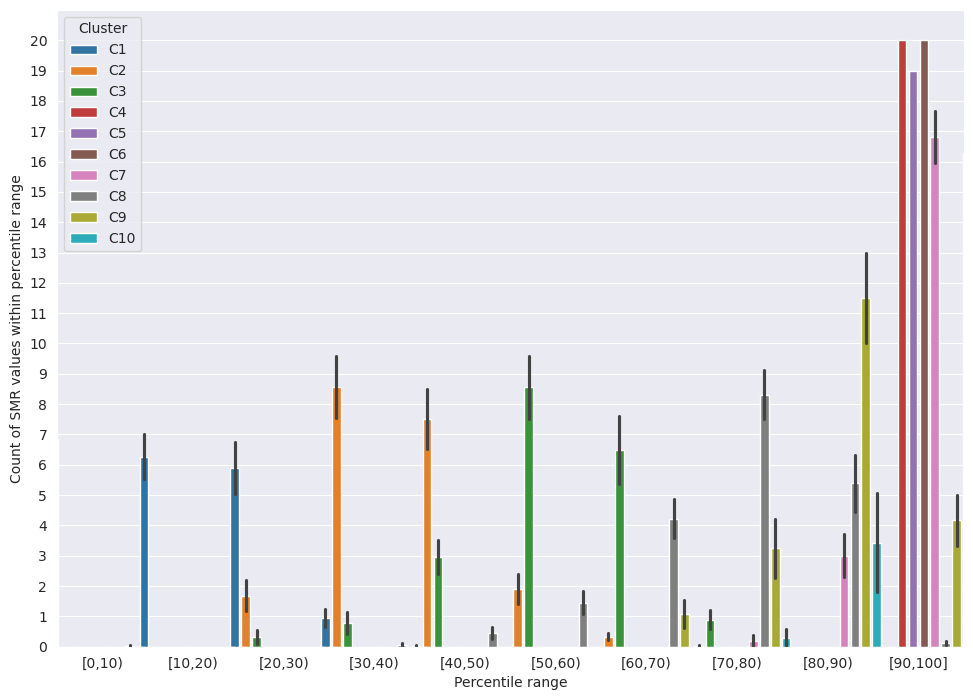

In [93]:
rcParams['figure.figsize'] = 11.7,8.27

pltc=sns.barplot(data=ccdfmr, x="Percentile range", y="Count of SMR values within percentile range", 
                 hue="Cluster", hue_order=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10'], errorbar='se',  
                 dodge=True, width=1.2, gap=0.2)
yticks = np.arange(0, 21, 1)
ylabels = [f'{y:d}' for y in yticks]
pltc.set_yticks(yticks, labels=ylabels)

# Group by region , group by cluster

In [113]:
#ccdfmr
#df['branch'] = df.groupby(['Name'])['branch'].transform(lambda x : ' '.join(x)) 
ccdfmr_groupped=ccdfmr.copy()
ccdfmr_groupped.rename(columns={"Percentile range" :"percentile", "Count of SMR values within percentile range":"count"}, inplace=True)
finaldf=ccdfmr_groupped[ ccdfmr_groupped['count']>0].groupby(['region_wb','Cluster','name','percentile']).agg({"count": np.sum })
finaldf.head

<bound method NDFrame.head of                                                   count
region_wb           Cluster name      percentile       
East Asia & Pacific C1      Brunei    [0,10)         20
                            Cambodia  [20,30)        12
                                      [30,40)         8
                            Indonesia [0,10)         15
                                      [10,20)         5
...                                                 ...
Sub-Saharan Africa  C9      Namibia   [80,90)         3
                                      [90,100]        8
                            Zambia    [70,80)         2
                                      [80,90)        17
                                      [90,100]        1

[479 rows x 1 columns]>

In [114]:
finaldf.to_csv("quantification.csv")

## Compute SMR Q25 and Q75 for each country

In [5]:
df.head

<bound method NDFrame.head of           Country  Period        Gender   SMR
0     Afghanistan    2019  Both genders   6.0
1     Afghanistan    2018  Both genders   5.9
2     Afghanistan    2017  Both genders   6.0
3     Afghanistan    2016  Both genders   6.0
4     Afghanistan    2015  Both genders   6.0
...           ...     ...           ...   ...
3655     Zimbabwe    2004  Both genders  21.5
3656     Zimbabwe    2003  Both genders  20.2
3657     Zimbabwe    2002  Both genders  20.3
3658     Zimbabwe    2001  Both genders  19.5
3659     Zimbabwe    2000  Both genders  20.0

[3660 rows x 4 columns]>

In [14]:
def q25(x):
    return x.quantile(0.25)

def q50(x):
    return x.quantile(0.5)

def q75(x):
    return x.quantile(0.75)
    
finaldf=df.groupby(['Country']).agg({"SMR": [q25, q50,  q75]})
finaldf.head


<bound method NDFrame.head of                         SMR               
                        q25    q50     q75
Country                                   
Afghanistan           6.000   6.75   7.625
Albania               4.425   4.85   7.625
Algeria               2.775   3.10   3.850
Angola               13.250  14.20  17.125
Antigua_and_Barbuda   0.175   0.35   1.300
...                     ...    ...     ...
Venezuaela            2.375   3.65   4.875
VietNam               7.075   7.30   7.500
Yemen_Rep.            7.100   7.50   8.025
Zambia               17.600  19.35  21.875
Zimbabwe             21.875  26.55  31.475

[183 rows x 3 columns]>

In [15]:
finaldf.to_csv("quartiles.csv")